## Simulation of E(W(t)|F(s)) = W(s) using nested Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = 10 
s = 5
NoOfPaths = 1000
NoOfSteps = 10

In [3]:
# First part to calculate E(W(t)|F(0)) = W(0) = 0
def martingaleA():
    W_t   = np.random.normal(0, pow(t, 0.5), [NoOfPaths, NoOfSteps])
    print(W_t)
    E_W_t = np.mean(W_t)
    
    print("mean value equals to: %.2f while the expected value is W(0) = %0.2f " %(E_W_t,0.0))
    
martingaleA()

[[ 4.34207018 -5.93755038 -0.6629053  ... -3.99531571  6.39255357
   0.51037399]
 [ 1.45472055  3.3366245  -2.75733445 ...  2.44508857  2.20452355
  -1.94582229]
 [ 3.40171954  3.88963591  0.663816   ...  4.19234828  0.13781522
  -4.62819876]
 ...
 [-0.74012122  0.57979058 -2.27691244 ... -1.43498111 -4.81672468
   3.70502951]
 [ 5.5967182   1.28303391  0.93488774 ...  4.36988184 -2.69033386
   1.77329088]
 [ 1.46875753 -0.71436378  2.62099872 ... -0.17579722  0.07477122
   1.50424586]]
mean value equals to: 0.06 while the expected value is W(0) = 0.00 


[-1.1102230246251565e-16, 0.0, 0.0, 2.220446049250313e-16, 0.0, 0.0, 4.440892098500626e-16, 4.440892098500626e-16, 0.0, -5.551115123125783e-17, -1.0408340855860843e-17, 0.0, 0.0, 0.0, 4.163336342344337e-17, 2.220446049250313e-16, 4.440892098500626e-16, -6.938893903907228e-18, -2.42861286636753e-17, 4.440892098500626e-16, 2.220446049250313e-16, 0.0, -2.220446049250313e-16, 0.0, 8.881784197001252e-16, 0.0, -2.220446049250313e-16, 0.0, 0.0, 8.881784197001252e-16, 0.0, 0.0, 4.440892098500626e-16, 0.0, -5.551115123125783e-17, -2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 0.0, 2.7755575615628914e-17, -2.220446049250313e-16, -8.881784197001252e-16, 1.1102230246251565e-16, 0.0, 0.0, 0.0, 5.551115123125783e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1102230246251565e-16, -4.440892098500626e-16, 0.0, 1.1102230246251565e-16, -1.1102230246251565e-16, -2.7755575615628914e-17, 2.220446049250313e-16, 0.0, 0.0, 8.881784197001252e-16, -8.881784197001252e-16, -8.326672684688674e-17, -2

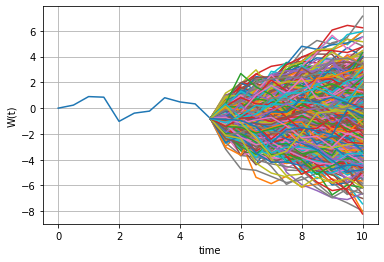

In [12]:
# Second part requiring nested Monte Carlo simulation E(W(t)|F(s)) = W(s)
def martingaleB():
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    # time step from [t0, s]
    dt1 = s / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
        
        W[:, i + 1] = W[:, i] + pow(dt1, 0.5) * Z[:, i]
        
    # W_s is the last column of W
    W_s = W[:, -1]
    
    # for every path W(s) we perform sub-simulation until time t and calculate 
    # the expectation 
    
    # time step from [s, t]
    dt2 = (t - s) / float(NoOfSteps)
    
    W_t = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    # Store the result
    E_W_t = np.zeros([NoOfPaths])
    Error = []
    
    for i in range(0, NoOfPaths):
        # Sub-simulation from time s until s
        W_t[:, 0] = W_s[i]
        
        Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
        
        for j in range(0, NoOfSteps):
            # Making sure that samples from normal have mean 0 and variance 1
            Z[:, j] = (Z[:, j] - np.mean(Z[:, j])) / np.std(Z[:, j])
        
            W_t[:, j + 1] = W_t[:, j] + pow(dt2, 0.5) * Z[:, j]
        
        E_W_t[i] = np.mean(W_t[:, -1])
        Error.append(E_W_t[i] - W_s[i])
        
        # Generate a plot  for the first path
        if i == 0:
            plt.plot(np.linspace(0, s, NoOfSteps + 1), W[0, :])
            for j in range(0, NoOfPaths):
                plt.plot(np.linspace(s, t, NoOfSteps + 1), W_t[j, :])
            plt.xlabel("time")
            plt.ylabel("W(t)")
            plt.grid()
        
    print(Error)
    error = np.max(np.abs(E_W_t-W_s))
    print("The error is equal to: %.18f"%(error))
    
martingaleB()
            